In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("merged_data.csv",index_col=0)

In [3]:
df.head()

,text,retweetCount,likeCount,isQuote,source,userId,userFollowersCount,userVerified,userProtected,userFriendsCount,...,feat_1,feat_2,feat_3,feat_4,flair_sentiment,flair_fast_sentiment,polarity,polarity_positive,polarity_negative,polarity_compound
0,.... annnnd now he loses 5th Amendment protect...,2999,0,True,WEB,800762241825980416,243,False,False,561,...,0.003181,0.005748,0.007677,0.008153,-0.992080,-0.838077,-0.30,0.049,0.094,-0.2732
1,BREAKING : As the Supreme Court long ago estab...,1639,0,False,IPHONE,628818151,2881,False,False,2726,...,0.001578,0.001716,0.001954,0.002116,0.753376,0.752001,-0.05,0.216,0.074,0.4588
2,On General Michael Flynn ' s pardon As Trump p...,1045,0,False,IPHONE,1018697824282656768,10893,False,False,11596,...,0.000726,0.001803,0.003193,0.003481,-0.943736,0.657989,0.15,0.228,0.149,0.3182
3,"Now correct me if I am wrong , but does not Mi...",264,0,False,ANDROID,790033182011695105,1871,False,False,4178,...,0.000726,0.001403,0.003557,0.005748,0.607614,-0.984295,-0.50,0.100,0.169,-0.2413
4,.... but now Flynn loses 5th Amendment protect...,0,0,False,IPHONE,1317539640170049536,22,False,False,102,...,0.003181,0.005748,0.007677,0.008153,-0.960922,-0.772128,-0.30,0.061,0.139,-0.3919


In [4]:
df.columns

Index(['text', 'retweetCount', 'likeCount', 'isQuote', 'source', 'userId',
       'userFollowersCount', 'userVerified', 'userProtected',
       'userFriendsCount', 'userStatusesCount', 'userListedCount',
       'userOnTwitter(Months)', 'trending', 'feat_0', 'feat_1', 'feat_2',
       'feat_3', 'feat_4', 'flair_sentiment', 'flair_fast_sentiment',
       'polarity', 'polarity_positive', 'polarity_negative',
       'polarity_compound'],
      dtype='object')

In [6]:
df.source = df.source.map({"UNKNOWN":0,"ANDROID":1,"IPHONE":2,"WEB":3})

In [9]:
df.drop(['text', 'userId'],axis=1, inplace=True)

In [11]:
df = df*1.0

In [13]:
df.columns

Index(['retweetCount', 'likeCount', 'isQuote', 'source', 'userFollowersCount',
       'userVerified', 'userProtected', 'userFriendsCount',
       'userStatusesCount', 'userListedCount', 'userOnTwitter(Months)',
       'trending', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4',
       'flair_sentiment', 'flair_fast_sentiment', 'polarity',
       'polarity_positive', 'polarity_negative', 'polarity_compound'],
      dtype='object')

In [15]:
train_attrb = ['isQuote', 'source', 'userFollowersCount',
       'userVerified', 'userProtected', 'userFriendsCount',
       'userStatusesCount', 'userListedCount', 'userOnTwitter(Months)',
       'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4',
       'flair_sentiment', 'flair_fast_sentiment', 'polarity',
       'polarity_positive', 'polarity_negative', 'polarity_compound']
target_attrb = ['retweetCount', 'likeCount','trending']

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
logreg = LogisticRegression()
scaler = StandardScaler()

In [20]:
train_x = scaler.fit_transform(df[train_attrb])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_x, df.trending,
                                                    test_size=0.33, random_state=42)

In [25]:
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))

0.9825392528424473


In [26]:
logreg.score(X_test,y_test)

0.9813135476779336

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
y_proba = logreg.predict_proba(X_test)

In [38]:
roc_auc_score(np.eye(2)[np.array(y_test).astype(int)],y_proba)

0.9931694851814257

In [30]:
y_proba

array([[9.99759912e-01, 2.40088214e-04],
       [9.99597097e-01, 4.02902601e-04],
       [9.99931083e-01, 6.89173624e-05],
       ...,
       [9.99758490e-01, 2.41510281e-04],
       [9.98370352e-01, 1.62964812e-03],
       [9.99913197e-01, 8.68027833e-05]])

In [37]:
np.eye(2)[np.array(y_test).astype(int)].sum(0)

array([3238.,  401.])

(array([9.304e+03, 0.000e+00, 3.180e+02, 7.300e+01, 4.300e+01, 1.700e+01,
        1.500e+01, 1.100e+01, 1.100e+01, 1.300e+01, 1.000e+01, 9.000e+00,
        2.000e+01, 3.200e+01, 3.000e+01, 4.000e+01, 4.300e+01, 5.600e+01,
        5.800e+01, 7.200e+01, 8.200e+01, 8.000e+01, 8.000e+01, 8.500e+01,
        9.200e+01, 8.000e+01, 6.200e+01, 7.300e+01, 6.900e+01, 3.900e+01,
        3.000e+01, 3.000e+01, 1.000e+01, 1.100e+01, 9.000e+00, 9.000e+00,
        2.000e+00, 7.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.14502226, 0.29004451, 0.43506677, 0.58008902,
        0.72511128, 0.87013353, 1.01515579, 1.16017804, 1.3052003 ,
        1.45022255, 1.59524481, 1.74026706, 1.88528932, 2.03031157,
        2.17533383, 2.32035608, 2.46537834, 2.6104006 , 2.75542285,
        2.90044511, 3.04546736, 3.19048962, 3.33551187, 3.48053413,
        3.62555638, 3.77057864, 3.91560089, 4.06062315, 4.2056454 ,
        4.35066766, 4.49568991, 4.64071217, 4.78573442, 4.93075668,
        5.07577894, 5.2208

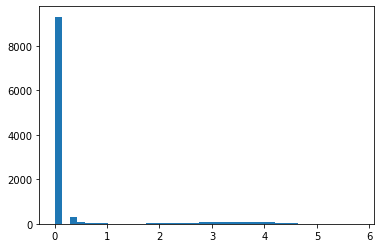

In [44]:
plt.hist(np.log10(1+df.likeCount),bins=40)

(array([9803.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

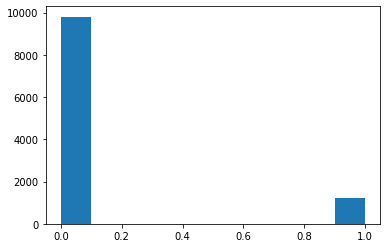

In [45]:
plt.hist(df.trending)